In [1]:
#importing all the required libraries
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib 
import sklearn
import warnings
from sklearn import linear_model
from sklearn.model_selection import train_test_split
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline

In [2]:

df = pd.read_csv('andhra_linear_total.csv')
xs=df.iloc[:,0]
ys=df.iloc[:,1:]
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.4, random_state=0)
print("Year\n"+str(X_train)+"\n\nCrimes\n"+str(y_train))
print("For test data \nYear\n"+str(X_test)+"\n\nCrimes\n"+str(y_test))

Year
8    2009
1    2002
7    2008
9    2010
3    2004
0    2001
5    2006
Name: Year, dtype: int64

Crimes
   Rape  Kidnapping and Abduction  Dowry Deaths  \
8  1188                        28           546   
1  1002                        38           449   
7  1257                        47           556   
9  1362                        46           588   
3  1016                        41           512   
0   871                        55           420   
5  1049                        51           519   

   Assault on women with intent to outrage her modesty  \
8                                               5147     
1                                               3799     
7                                               4730     
9                                               4634     
3                                               3817     
0                                               3544     
5                                               4534     

   Insult to modes

In [3]:
len(X_train),len(y_train)

(7, 7)

In [4]:
x_xtrain_dowry=X_train
#print(x_xtrain_rape)
y_ytrain_dowry=y_train.iloc[:,2]
#print(y_ytrain_rape)
#plt.scatter(x_xtrain_rape,y_ytrain_rape)
#plt.ylabel("Rape crime Rate")
#plt.xlabel("Year")
#plt.show()

In [5]:
def slope_intercept(x_val,y_val):
  x=np.array(x_val)
  y=np.array(y_val)
  m=( ( (np.mean(x)*np.mean(y)) - np.mean(x*y) ) /
    ((np.mean(x)*np.mean(x))-np.mean(x*x)) )
  m=round(m,2)
  b=(np.mean(y)-np.mean(x)*m)
  b=round(b,2)
  
  return m,b

slope_intercept(x_xtrain_dowry,y_ytrain_dowry)

(16.45, -32481.14)

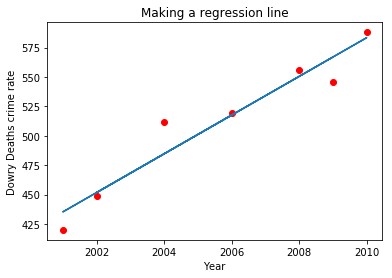

In [6]:
m,b=slope_intercept(x_xtrain_dowry,y_ytrain_dowry)
reg_line=[(m*x)+b for x in x_xtrain_dowry]
plt.scatter(x_xtrain_dowry,y_ytrain_dowry,color="red")
plt.plot(x_xtrain_dowry,reg_line)
plt.ylabel("Dowry Deaths crime rate")
plt.xlabel("Year")
plt.title("Making a regression line")
plt.savefig('dowry_before_pred.png')

In [7]:
x_xtest_dowry=X_test
y_ytest_dowry=y_test.iloc[:,-5]
print("X_test(Year)")
for x in np.nditer(x_xtest_dowry):
  print(x)
print("\n\nY_test(Actual)")
for x in np.nditer(y_ytest_dowry):
  print(x)
ypredd=m*x_xtest_dowry+b
print("\n\nY_Predicted")
for x in np.nditer(ypredd):
  print(int(x))

X_test(Year)
2007
2012
2005
2011
2003


Y_test(Actual)
613
504
443
599
466


Y_Predicted
534
616
501
599
468


Years: [2009 2002 2008 2010 2004 2001 2006 2007 2012 2005 2011 2003]
dowry: 
[546.   449.   556.   588.   512.   420.   519.   534.01 616.26 501.11
 599.81 468.21]


Text(0.5, 1.0, 'Making a regression line')

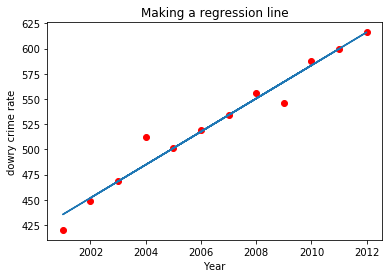

In [9]:
trmergedlist0=np.concatenate((x_xtrain_dowry,x_xtest_dowry), axis=0)
print("Years: "+str(trmergedlist0))

reg_line=[(m*x)+b for x in trmergedlist0]

temergedlist0=np.concatenate((y_ytrain_dowry,ypredd), axis=0)
print("dowry: ")
    
print(str(temergedlist0))

plt.scatter(trmergedlist0,temergedlist0,color="red")
plt.plot(trmergedlist0,reg_line)
plt.ylabel("dowry crime rate")
plt.xlabel("Year")
plt.title("Making a regression line")

In [10]:
years = np.array([2013,2014,2015,2016,2017,2018,2019,2020])
df1=pd.DataFrame(years)
#print(df1)
ypredd1=(m*years+b)


In [11]:
trmergedlist=np.concatenate((x_xtrain_dowry,x_xtest_dowry, years), axis=0)
print("Years: "+str(trmergedlist))

#print(temergedlist)
#m,b=slope_intercept(trmergedlist,temergedlist)

reg_line=[(m*x)+b for x in trmergedlist]

temergedlist=np.concatenate((y_ytrain_dowry,y_ytest_dowry,ypredd1), axis=0)
print("Dowry Deaths: ")
    
print(str(temergedlist))



Years: [2009 2002 2008 2010 2004 2001 2006 2007 2012 2005 2011 2003 2013 2014
 2015 2016 2017 2018 2019 2020]
Dowry Deaths: 
[546.   449.   556.   588.   512.   420.   519.   613.   504.   443.
 599.   466.   632.71 649.16 665.61 682.06 698.51 714.96 731.41 747.86]


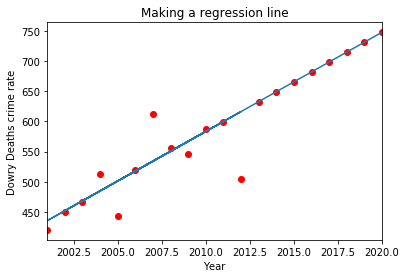

In [12]:
plt.scatter(trmergedlist,temergedlist,color="red")
plt.plot(trmergedlist,reg_line)
plt.xlim((2001,2020))
#plt.ylim((800,1900))
plt.ylabel("Dowry Deaths crime rate")
plt.xlabel("Year")
plt.title("Making a regression line")
plt.savefig('dowry_after_pred.png')